In [6]:
df<-read.csv('d:/data/avocado/avocado.csv')
head(df)

Total.Volume,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,conventional,organic,AveragePrice,Label
29913744,9987522,6837126.1,2911554.5,238841.36,1,0,1.41,1
28785280,8944923,6592504.0,2117565.5,234853.10,1,0,1.47,1
26808411,7926179,5851814.5,1855970.2,218394.57,1,0,1.57,1
26385081,8027435,6035666.2,1818832.5,172936.77,1,0,1.56,1
3357719,1256272,832554.7,340048.8,83668.14,1,0,1.42,1
25394903,7496232,5494163.7,1923561.4,78506.59,1,0,1.57,1


In [7]:
library(dplyr)
df<-df %>% select(-AveragePrice)
head(df)
dim(df)

Total.Volume,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,conventional,organic,Label
29913744,9987522,6837126.1,2911554.5,238841.36,1,0,1
28785280,8944923,6592504.0,2117565.5,234853.10,1,0,1
26808411,7926179,5851814.5,1855970.2,218394.57,1,0,1
26385081,8027435,6035666.2,1818832.5,172936.77,1,0,1
3357719,1256272,832554.7,340048.8,83668.14,1,0,1
25394903,7496232,5494163.7,1923561.4,78506.59,1,0,1


[1] 18249     8


   0    1 
9662 8587 

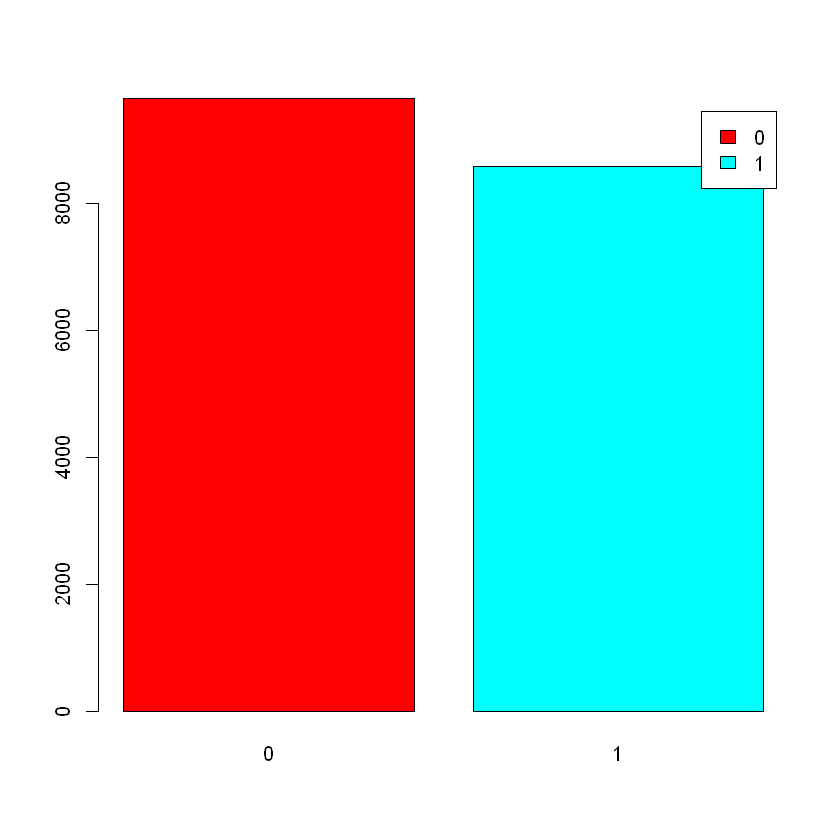

In [8]:
(tbl<-table(df$Label))
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트 플롯

In [10]:
library(ROSE)
df_samp<-ovun.sample(Label~., data=df, seed=1, method='under',
                    N=8587*2)$data
(tbl<-table(df_samp$Label))


   0    1 
8587 8587 

In [12]:
library(caret)
set.seed(19000)
idx_train<-createDataPartition(y=df$Label, p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-8]
y_train<-train[,8]
test<-df[-idx_train,]
X_test<-test[,-8]
y_test<-test[,8]

,k,accuracy
7,7,0.7969307


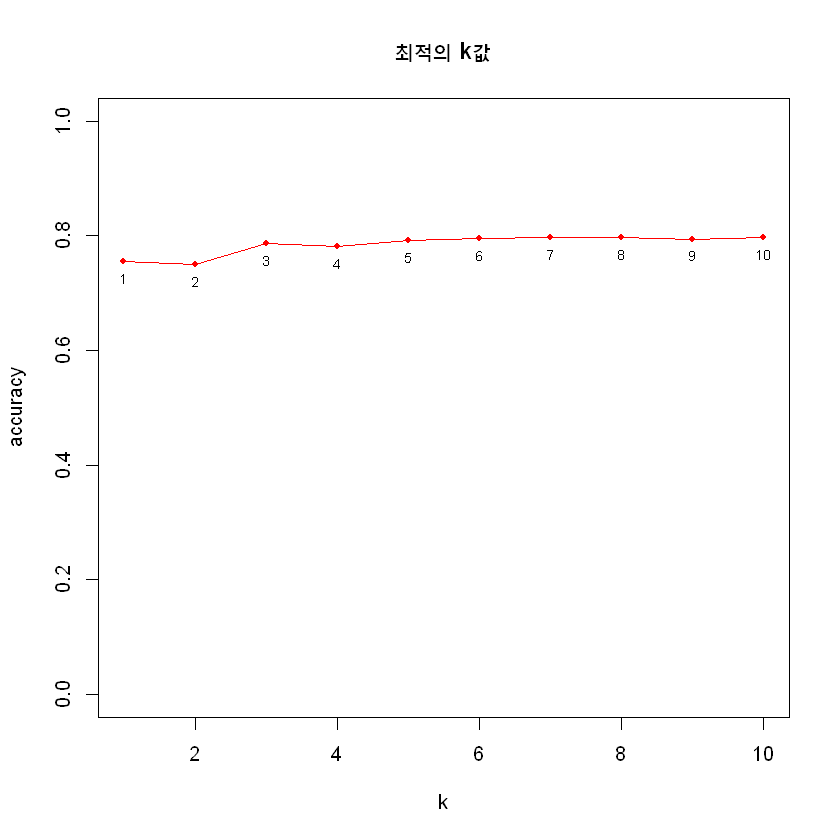

In [16]:
library(class)
acc<-NULL
for ( i in c(1:10)){
    set.seed(19000)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    acc<-c(acc,mean(y_test == pred))
}
df<-data.frame(k=c(1:10), accuracy=acc)
plot(accuracy ~ k , data=df, type='o',pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
with(df,text(accuracy ~ k, labels=c(1:10),pos=1,cex=0.7))
n<-min(df[df$accuracy %in% max(acc),'k'])
df[n,]

In [17]:
library(class)
set.seed(19000)
pred<-knn(train=train, test=test, cl=y_train, k=n)
table(y_test,pred)
mean(y_test==pred)

      pred
y_test    0    1
     0 1564  358
     1  383 1344

[1] 0.7969307